# Predicting heart disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleaveland data from the UCI Machine Learning Repository.

There is also a version of it available on Kaggle.

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in the data.

**Create data dictionary**

* age: age in years
* sex: 1 = male; 0 = female)
* cp: chest pain type
* trestbps: resting blood pressure
* chol: serum cholesterol in mg/dl
* fbs: fasting blood sugar > 130 mg/dl (1 = true; 0 = false)
* restecg: resting electrocardiographic results
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed; 7 = reversable defect
* target: 1 or 0

## Preparing the tools

We're going to use pandas, matplotlib, and numpy for data analysis and manipulation

In [1]:
# !pip install seaborn --upgrade

In [2]:
# Importing all the tools

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# in order for our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay, ConfusionMatrixDisplay

## Load Data

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change, or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Checking for any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# How many of each class there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

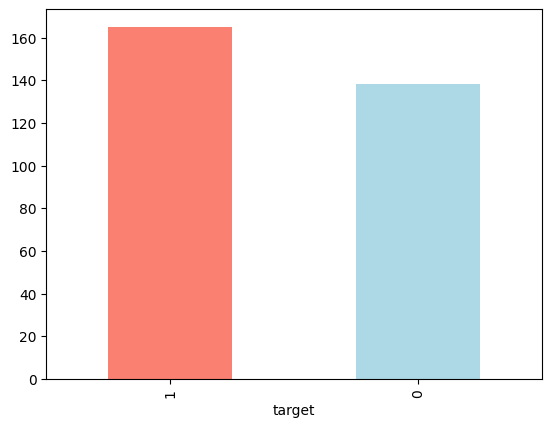

In [8]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [11]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


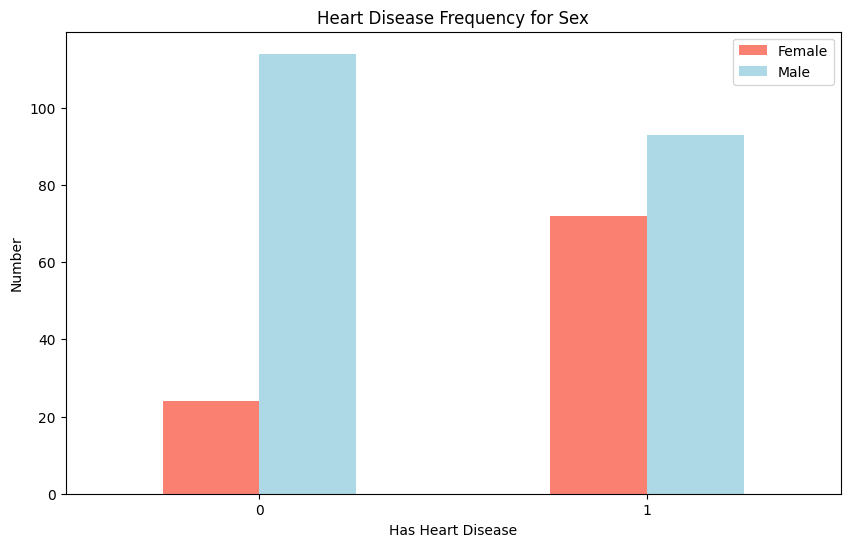

In [13]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Has Heart Disease")
plt.ylabel("Number")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [14]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs. Max Heart Rate for Heart Disease

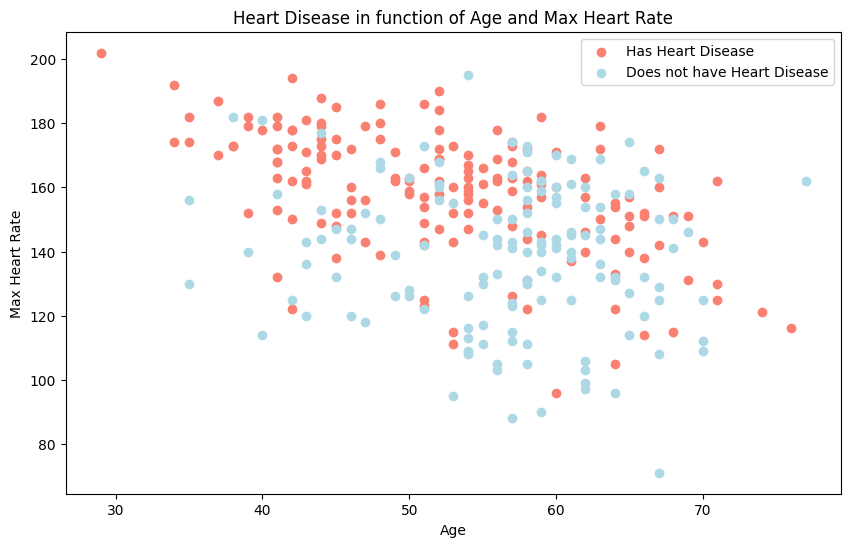

In [15]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive nad negative examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="salmon")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Has Heart Disease", "Does not have Heart Disease"]);

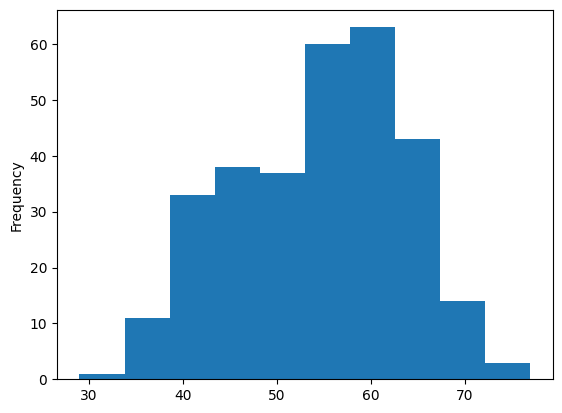

In [16]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain type

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

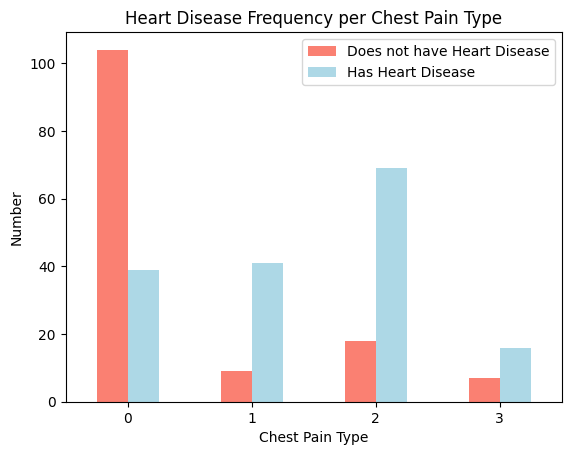

In [18]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["salmon", 'lightblue'])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Number")
plt.legend(["Does not have Heart Disease", "Has Heart Disease"])
plt.xticks(rotation=0)

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [21]:
# Current version of seaborn doesn't show all the annotations
# Upgrading searborn
# !pip install seaborn --upgrade

In [22]:
import seaborn as sns
sns.__version__

'0.13.1'

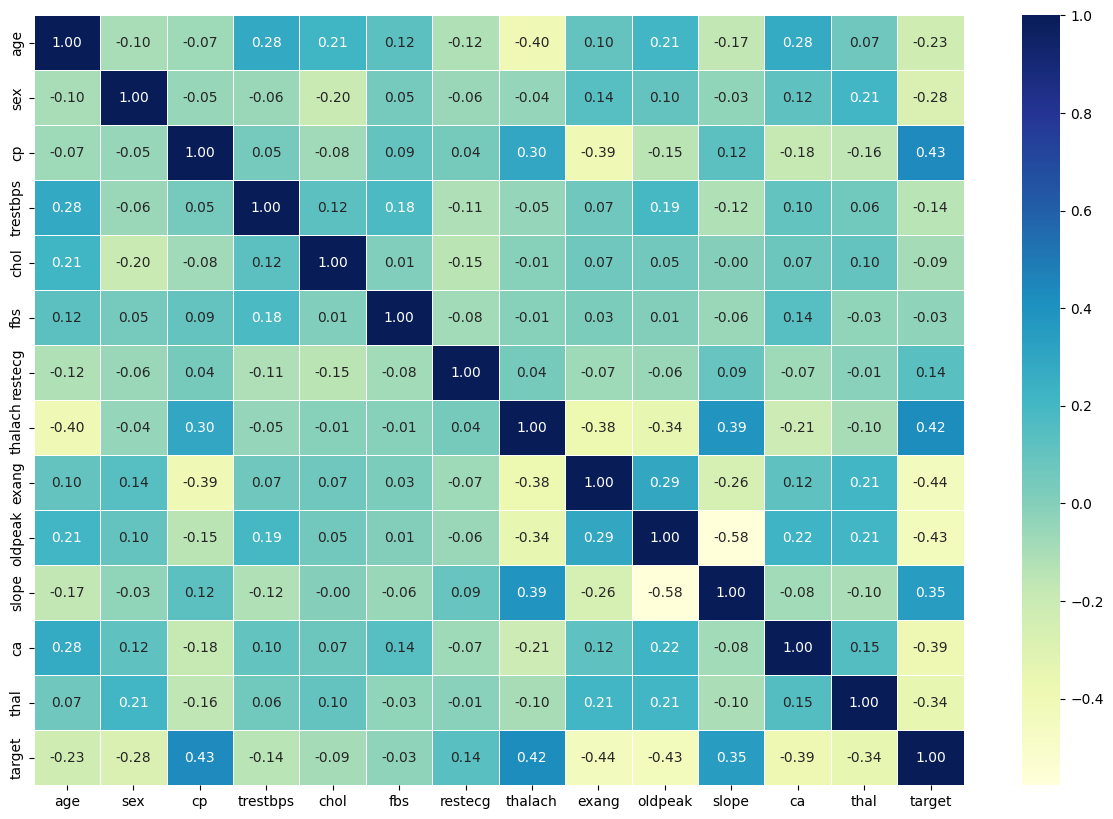

In [23]:
# Let's make our correlation matrix a little prettier
# Seaborn version 0.12.2 doesn't show all the annotations
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

## 5. Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# Split the data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [26]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [28]:
# Split the data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 6. Experimentation
Trying three different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [30]:
# Putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train : training data of the features
    X_test : testing data of the features
    y_train : training labels
    y_test : testing labels
    """

    # For reproductibility
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [31]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
print(model_scores)

{'Logistic Regression': 0.8852459016393442, 'KNN': 0.6885245901639344, 'Random Forest': 0.8360655737704918}


/Users/shriyavaagdevichikati/Downloads/ml-course/heart_disease_project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Comparison

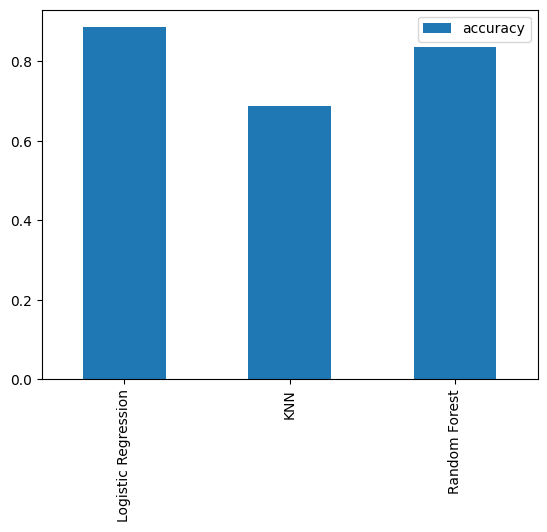

In [32]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

We have a baseline model. Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the Curve (AUC)

### Hyperparameter tuning

In [33]:
# Tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [34]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [35]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


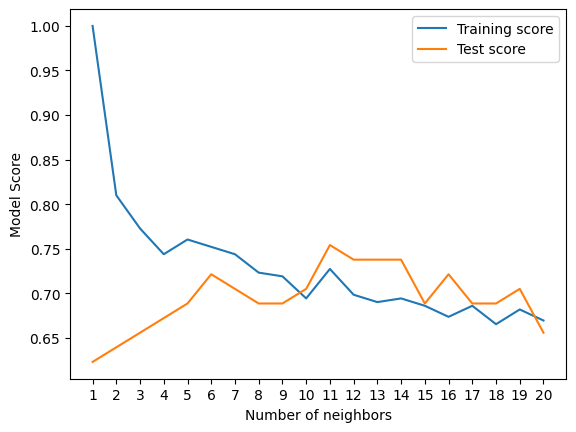

In [36]:
plt.plot(neighbors, train_scores, label="Training score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()
..using RandomizedSearchCV()

In [50]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [51]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [52]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [53]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [54]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [55]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [56]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [57]:
# Original scores
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Hyperparameter tuning using GridSearchCV

In [58]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-10, 10, 100),
               "solver": ["liblinear", "lbfgs"],
               "max_iter": [10000]}
# LogisticRegression()
# Tune LogisticRegression
np.random.seed(42)

gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.328761...
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'max_iter': [10000],
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [59]:
gs_log_reg.best_params_

{'C': 0.19630406500402683, 'max_iter': 10000, 'solver': 'liblinear'}

In [60]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [61]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [49]:
# Trying GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb_grid = {"loss": ["log_loss", "exponential"],
          "criterion": ["friedman_mse", "squared_error"],
          "min_samples_split": np.arange(2, 10, 1),
          "min_samples_leaf": np.arange(1, 10, 1),
          "max_depth": [None, 3, 5, 10]}

gs_gb = GridSearchCV(estimator=GradientBoostingClassifier(),
                    param_grid=gb_grid,
                    cv=3,
                    verbose=True)

gs_gb.fit(X_train, y_train)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=True)

In [50]:
gs_gb.best_params_

{'criterion': 'squared_error',
 'loss': 'log_loss',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 7}

In [51]:
gs_gb.score(X_test, y_test)

0.7868852459016393

### Evaluating our tuned machine learning classifier beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Precision
* Recall
* F1_score

and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions

In [62]:
y_preds = gs_log_reg.predict(X_test)

In [63]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [64]:
y_preds_probs = gs_log_reg.predict_proba(X_test)
y_preds_probs[:10]

array([[0.8651604 , 0.1348396 ],
       [0.24432121, 0.75567879],
       [0.18674593, 0.81325407],
       [0.94432879, 0.05567121],
       [0.11751924, 0.88248076],
       [0.13069743, 0.86930257],
       [0.39421946, 0.60578054],
       [0.99552392, 0.00447608],
       [0.98581356, 0.01418644],
       [0.43619955, 0.56380045]])

In [65]:
y_probs_positive = y_preds_probs[:, 1]
y_probs_positive[:5]

array([0.1348396 , 0.75567879, 0.81325407, 0.05567121, 0.88248076])

In [66]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

Area under the curve: 0.9278


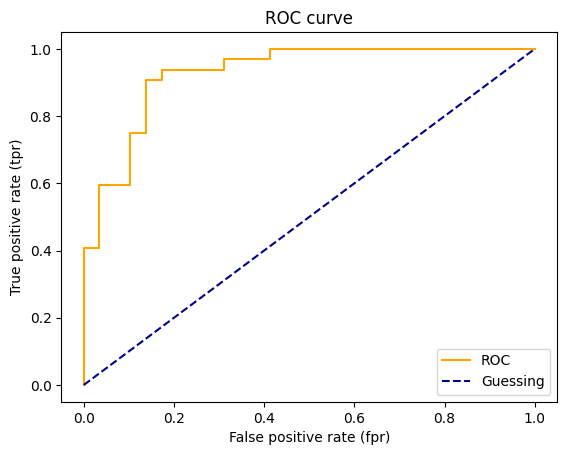

In [322]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

auc_roc = auc(fpr, tpr)
print(f"Area under the curve: {round(auc_roc, 4)}")

# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots an ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

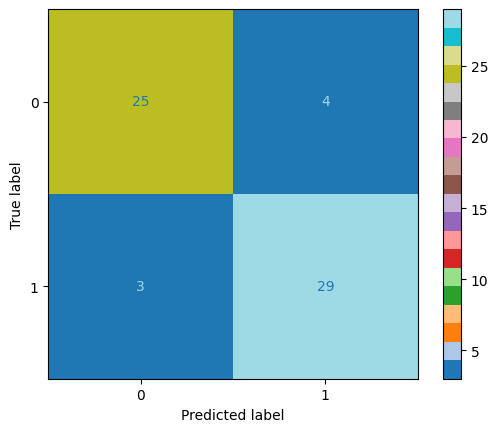

In [323]:
# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds)).plot(cmap="tab20");

In [324]:
# Evaluations on our one split
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

(We're going to calculate accuracy, precision, recall, f1-score using cross-validation using `cross_val_score`.)

In [70]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.19630406500402683, 'max_iter': 10000, 'solver': 'liblinear'}

In [71]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [72]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, scoring="accuracy", cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [73]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [74]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, scoring="precision", cv=5)
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [75]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, scoring="recall", cv=5)
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [76]:
# Cross-validated F1-score
cv_f1 = cross_val_score(clf, X, y, scoring="f1", cv=5)
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

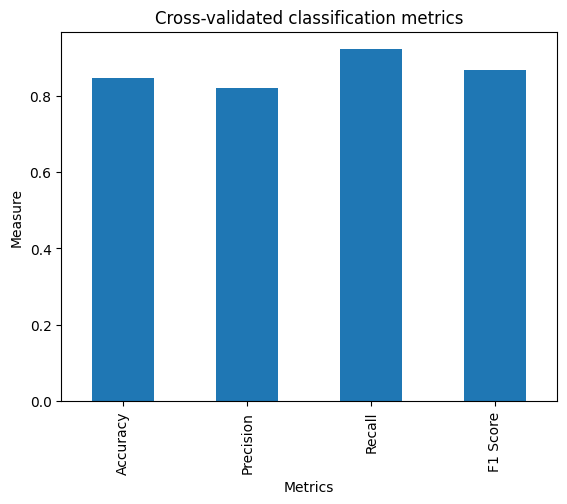

In [77]:
# Visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1 Score": cv_f1},
                         index=[0])
cv_metrics.T.plot(kind="bar", title="Cross-validated classification metrics", xlabel="Metrics", ylabel="Measure", legend=False);

### Feature importance

In [78]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.19630406500402683, max_iter=10000, solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.19630406500402683, max_iter=10000, solver='liblinear')

In [79]:
clf.coef_

array([[ 0.0030223 , -0.84634217,  0.65655537, -0.0115666 , -0.00164892,
         0.04294698,  0.30724848,  0.02455936, -0.59534885, -0.56693599,
         0.44450693, -0.63222848, -0.67263597]])

In [80]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [81]:
clf.coef_

array([[ 0.0030223 , -0.84634217,  0.65655537, -0.0115666 , -0.00164892,
         0.04294698,  0.30724848,  0.02455936, -0.59534885, -0.56693599,
         0.44450693, -0.63222848, -0.67263597]])

In [82]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': clf.coef_[0]})
# feature_importance = feature_importance.sort_values("Importance", ascending=False)
feature_importance

,Feature,Importance
0,age,0.003022
1,sex,-0.846342
2,cp,0.656555
3,trestbps,-0.011567
4,chol,-0.001649
5,fbs,0.042947
6,restecg,0.307248
7,thalach,0.024559
8,exang,-0.595349
9,oldpeak,-0.566936


<Axes: title={'center': 'Feature Importance'}, xlabel='Feature', ylabel='Importance'>

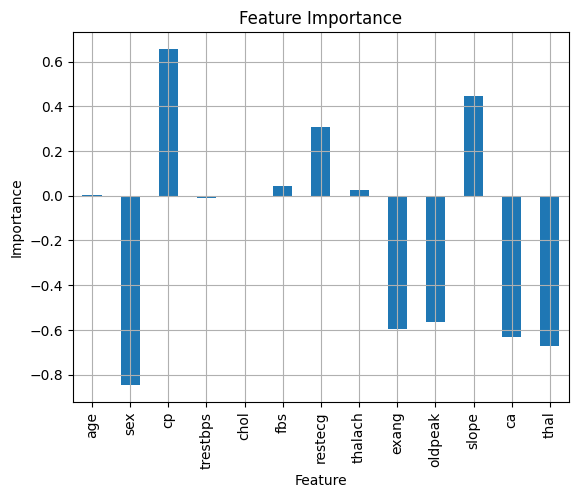

In [83]:
feature_importance.plot.bar(title="Feature Importance", x="Feature", y="Importance", ylabel="Importance", grid=True, legend=False)

In [84]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(clf.coef_[0])})
# feature_importance = feature_importance.sort_values("Importance", ascending=False)
feature_importance

,Feature,Importance
0,age,0.003022
1,sex,0.846342
2,cp,0.656555
3,trestbps,0.011567
4,chol,0.001649
5,fbs,0.042947
6,restecg,0.307248
7,thalach,0.024559
8,exang,0.595349
9,oldpeak,0.566936


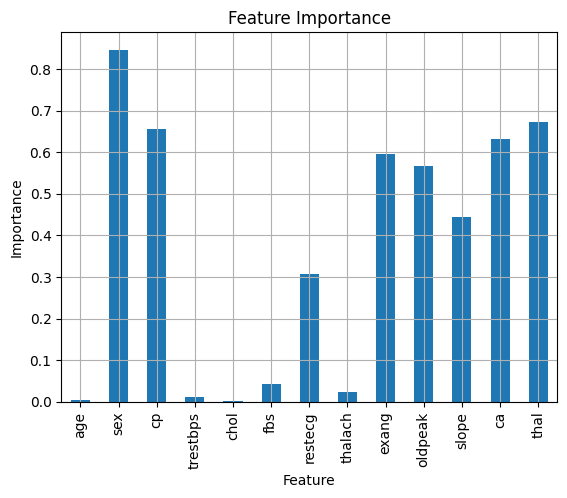

In [85]:
feature_importance.plot.bar(title="Feature Importance", x="Feature", y="Importance", ylabel="Importance", grid=True, legend=False);

In [306]:
# Trying CatBoostClassifier
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100,
                           learning_rate=0.004,
                           depth=2,
                           l2_leaf_reg=1000)

model.fit(X_train, y_train, verbose=False)

In [307]:
model.score(X_test, y_test)

0.9016393442622951

### Evaluating tuned model beyond accuracy

In [309]:
y_preds_cat = model.predict(X_test)
y_preds_cat

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [316]:
y_pred_probs_cat = model.predict_proba(X_test)
y_pred_probs_cat[:5]

array([[0.50121139, 0.49878861],
       [0.49879839, 0.50120161],
       [0.49960746, 0.50039254],
       [0.50183489, 0.49816511],
       [0.49890346, 0.50109654]])

In [319]:
y_probs_positive_cat = y_pred_probs_cat[:, 1]
y_probs_positive_cat[:5]

array([0.49878861, 0.50120161, 0.50039254, 0.49816511, 0.50109654])

Area under the curve: 0.929956897


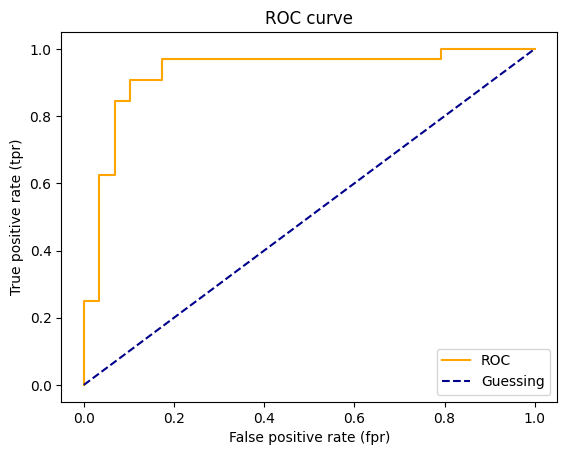

In [328]:
fpr_cat, tpr_cat, thresholds_cat = roc_curve(y_test, y_probs_positive_cat)

auc_roc_cat = auc(fpr_cat, tpr_cat)
print(f"Area under the curve: {round(auc_roc_cat, 9)}")

plot_roc_curve(fpr_cat, tpr_cat)

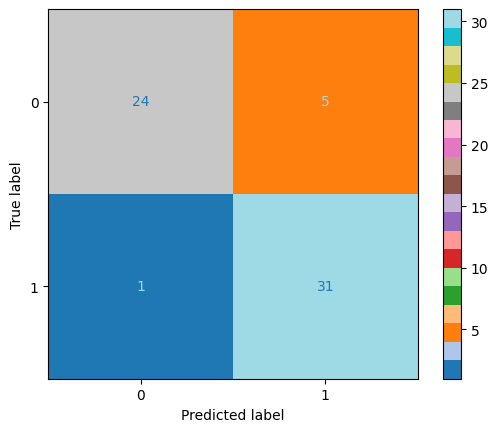

In [330]:
# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds_cat)).plot(cmap="tab20");

In [334]:
# Evaluations on our one split
print(classification_report(y_test, y_preds_cat))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        29
           1       0.86      0.97      0.91        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



### Calculate evaluation metrics using cross-validation

(We're going to calculate accuracy, precision, recall, f1-score using cross-validation using `cross_val_score`.)

In [338]:
cv_acc_cat = cross_val_score(model, X, y, scoring="accuracy", cv=5)
cv_acc_cat = np.mean(cv_acc_cat)

0:	learn: 0.6931227	total: 351us	remaining: 34.8ms
1:	learn: 0.6931083	total: 779us	remaining: 38.2ms
2:	learn: 0.6930789	total: 977us	remaining: 31.6ms
3:	learn: 0.6930590	total: 1.14ms	remaining: 27.4ms
4:	learn: 0.6930300	total: 1.3ms	remaining: 24.7ms
5:	learn: 0.6930190	total: 1.47ms	remaining: 23ms
6:	learn: 0.6929908	total: 1.62ms	remaining: 21.5ms
7:	learn: 0.6929700	total: 1.78ms	remaining: 20.4ms
8:	learn: 0.6929415	total: 1.94ms	remaining: 19.7ms
9:	learn: 0.6929149	total: 2.08ms	remaining: 18.7ms
10:	learn: 0.6928902	total: 2.22ms	remaining: 17.9ms
11:	learn: 0.6928625	total: 2.37ms	remaining: 17.4ms
12:	learn: 0.6928345	total: 2.5ms	remaining: 16.8ms
13:	learn: 0.6928049	total: 2.64ms	remaining: 16.2ms
14:	learn: 0.6927793	total: 2.76ms	remaining: 15.6ms
15:	learn: 0.6927608	total: 2.86ms	remaining: 15ms
16:	learn: 0.6927320	total: 2.97ms	remaining: 14.5ms
17:	learn: 0.6927028	total: 3.09ms	remaining: 14.1ms
18:	learn: 0.6926745	total: 3.25ms	remaining: 13.8ms
19:	learn: 0

In [339]:
cv_acc_cat

0.8016939890710383

In [340]:
cv_precision_cat = cross_val_score(model, X, y, scoring="precision", cv=5)
cv_precision_cat = np.mean(cv_precision_cat)

0:	learn: 0.6931227	total: 405us	remaining: 40.2ms
1:	learn: 0.6931083	total: 931us	remaining: 45.6ms
2:	learn: 0.6930789	total: 1.1ms	remaining: 35.6ms
3:	learn: 0.6930590	total: 1.29ms	remaining: 31ms
4:	learn: 0.6930300	total: 1.44ms	remaining: 27.4ms
5:	learn: 0.6930190	total: 1.6ms	remaining: 25ms
6:	learn: 0.6929908	total: 1.75ms	remaining: 23.3ms
7:	learn: 0.6929700	total: 1.89ms	remaining: 21.8ms
8:	learn: 0.6929415	total: 2.06ms	remaining: 20.8ms
9:	learn: 0.6929149	total: 2.19ms	remaining: 19.7ms
10:	learn: 0.6928902	total: 2.34ms	remaining: 18.9ms
11:	learn: 0.6928625	total: 2.47ms	remaining: 18.1ms
12:	learn: 0.6928345	total: 2.6ms	remaining: 17.4ms
13:	learn: 0.6928049	total: 2.76ms	remaining: 16.9ms
14:	learn: 0.6927793	total: 2.95ms	remaining: 16.7ms
15:	learn: 0.6927608	total: 3.13ms	remaining: 16.4ms
16:	learn: 0.6927320	total: 3.31ms	remaining: 16.2ms
17:	learn: 0.6927028	total: 3.49ms	remaining: 15.9ms
18:	learn: 0.6926745	total: 3.65ms	remaining: 15.5ms
19:	learn: 0

In [342]:
cv_precision_cat

0.7787662897418995

In [343]:
cv_recall_cat = cross_val_score(model, X, y, scoring="recall", cv=5)
cv_recall_cat = np.mean(cv_recall_cat)

0:	learn: 0.6931227	total: 413us	remaining: 40.9ms
1:	learn: 0.6931083	total: 905us	remaining: 44.4ms
2:	learn: 0.6930789	total: 1.08ms	remaining: 35.1ms
3:	learn: 0.6930590	total: 1.26ms	remaining: 30.3ms
4:	learn: 0.6930300	total: 1.42ms	remaining: 27ms
5:	learn: 0.6930190	total: 1.58ms	remaining: 24.8ms
6:	learn: 0.6929908	total: 1.76ms	remaining: 23.4ms
7:	learn: 0.6929700	total: 1.91ms	remaining: 21.9ms
8:	learn: 0.6929415	total: 2.07ms	remaining: 20.9ms
9:	learn: 0.6929149	total: 2.22ms	remaining: 20ms
10:	learn: 0.6928902	total: 2.39ms	remaining: 19.4ms
11:	learn: 0.6928625	total: 2.53ms	remaining: 18.5ms
12:	learn: 0.6928345	total: 2.67ms	remaining: 17.9ms
13:	learn: 0.6928049	total: 2.81ms	remaining: 17.3ms
14:	learn: 0.6927793	total: 3.03ms	remaining: 17.2ms
15:	learn: 0.6927608	total: 3.21ms	remaining: 16.9ms
16:	learn: 0.6927320	total: 3.39ms	remaining: 16.6ms
17:	learn: 0.6927028	total: 3.58ms	remaining: 16.3ms
18:	learn: 0.6926745	total: 3.74ms	remaining: 15.9ms
19:	learn

In [344]:
cv_recall_cat

0.890909090909091

In [348]:
cv_f1_cat = cross_val_score(model, X, y, scoring="f1", cv=5)
cv_f1_cat = np.mean(cv_f1_cat)

0:	learn: 0.6931227	total: 331us	remaining: 32.8ms
1:	learn: 0.6931083	total: 676us	remaining: 33.2ms
2:	learn: 0.6930789	total: 818us	remaining: 26.5ms
3:	learn: 0.6930590	total: 957us	remaining: 23ms
4:	learn: 0.6930300	total: 1.1ms	remaining: 21ms
5:	learn: 0.6930190	total: 1.27ms	remaining: 19.9ms
6:	learn: 0.6929908	total: 1.39ms	remaining: 18.5ms
7:	learn: 0.6929700	total: 1.53ms	remaining: 17.6ms
8:	learn: 0.6929415	total: 1.66ms	remaining: 16.7ms
9:	learn: 0.6929149	total: 1.77ms	remaining: 15.9ms
10:	learn: 0.6928902	total: 1.9ms	remaining: 15.4ms
11:	learn: 0.6928625	total: 2.03ms	remaining: 14.9ms
12:	learn: 0.6928345	total: 2.14ms	remaining: 14.3ms
13:	learn: 0.6928049	total: 2.25ms	remaining: 13.8ms
14:	learn: 0.6927793	total: 2.36ms	remaining: 13.4ms
15:	learn: 0.6927608	total: 2.48ms	remaining: 13ms
16:	learn: 0.6927320	total: 2.59ms	remaining: 12.7ms
17:	learn: 0.6927028	total: 2.7ms	remaining: 12.3ms
18:	learn: 0.6926745	total: 2.82ms	remaining: 12ms
19:	learn: 0.69264

In [349]:
cv_f1_cat

0.8305420327159456

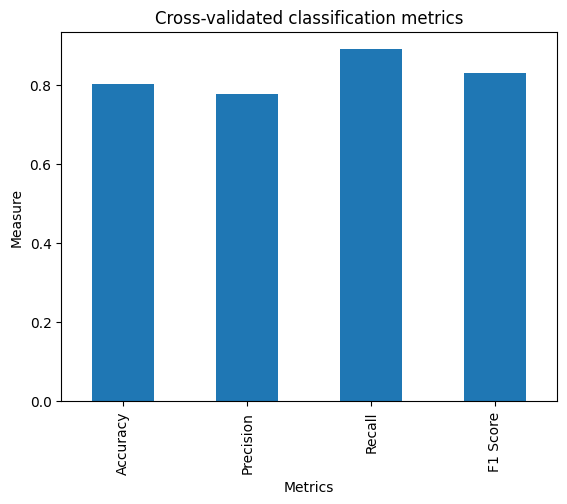

In [350]:
# Visualize our cross-validated metrics
cv_metrics_cat = pd.DataFrame({"Accuracy": cv_acc_cat,
                          "Precision": cv_precision_cat,
                          "Recall": cv_recall_cat,
                          "F1 Score": cv_f1_cat},
                         index=[0])
cv_metrics_cat.T.plot(kind="bar", title="Cross-validated classification metrics", xlabel="Metrics", ylabel="Measure", legend=False);

In [353]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
# feature_importance = feature_importance.sort_values("Importance", ascending=False)
feature_importance

,Feature,Importance
0,age,0.957409
1,sex,0.450606
2,cp,27.253514
3,trestbps,0.173438
4,chol,0.150556
5,fbs,0.000000
6,restecg,0.172140
7,thalach,3.428919
8,exang,6.679501
9,oldpeak,2.421735


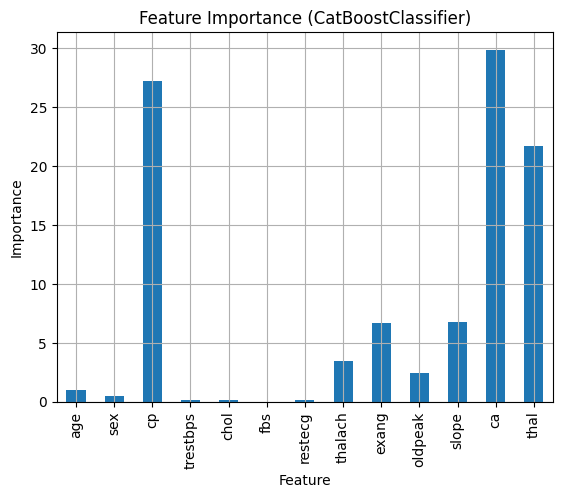

In [355]:
feature_importance.plot.bar(title="Feature Importance (CatBoostClassifier)", x="Feature", y="Importance", ylabel="Importance", grid=True, legend=False);

### Saving trained models using pickle

In [357]:
import pickle

# Save catboost model to file
pickle.dump(model, open("gs_catboost_model.pkl", "wb"))

In [358]:
# Save logistic regression model to file
pickle.dump(clf, open("gs_log_reg_model.pkl", "wb"))